<h1>PDBbind Database</h1>

In [1]:
from __future__ import print_function, division, unicode_literals

import oddt
from oddt.datasets import pdbbind

oddt.toolkit.image_size = (400, 400)

print(oddt.__version__)

0.4.1-16-gb8cc8d0


Download a dataset from [PDBbind](http://www.pdbbind.org.cn/) and unpack (I used [core-set 2016](http://www.pdbbind.org.cn/download/pdbbind_v2016_core.tar.gz)).

In [2]:
%%bash
wget -qO- http://www.pdbbind.org.cn/download/pdbbind_v2016_core.tar.gz | tar xz

In [3]:
directory = './core-set/'

We will use the pdbbind class. 

In [4]:
pdbbind_database = pdbbind(home=directory, 
    version='2016', 
    default_set='core') # Available sets in wrapper: core, refined, general_PL (general for 2007)

You can get one target or iterate over all of them. To do it you can use PDB ID of a target or an index from list in INDEX file (INDEX_refined_data.2016).

The class has two properties: ids and activities.

In [5]:
all_ids = pdbbind_database.ids
print('Number of targets:', len(all_ids))
print('First ten targets:', all_ids[:10])

Number of targets: 290
First ten targets: ['3ao4', '3gv9', '1uto', '1ps3', '4ddk', '4jsz', '3g2z', '3dxg', '3l7b', '3gr2']


In [6]:
all_activities = pdbbind_database.activities
print('First ten activities:', all_activities[:10])

First ten activities: [2.07, 2.12, 2.27, 2.28, 2.29, 2.3, 2.36, 2.4, 2.4, 2.52]


Let's choose one target.

In [7]:
target = pdbbind_database[0]

You can always check PDB ID.

In [8]:
target.id

'3ao4'

`Target` has three properties: protein, pocket and ligand. All of them are of `oddt.tolkit.Molecule` class.

Let's find the largest ligand.

In [9]:
max_atoms = 0

for target in pdbbind_database:
    if max_atoms < len(target.ligand.atoms):
        max_atoms = len(target.ligand.atoms)
        largest = target

print('Target ID:', largest.id, '\nNumber of atoms:', max_atoms)

Target ID: 3ag9 
Number of atoms: 140


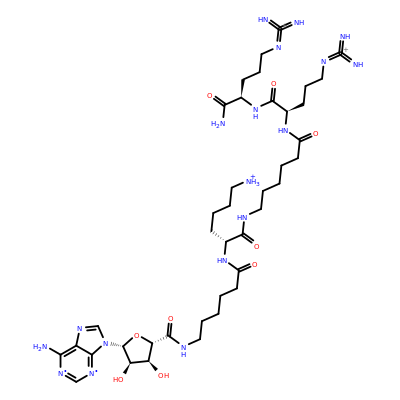

In [10]:
largest_ligand = largest.ligand
largest_ligand.removeh()
largest_ligand

If you want to check activity, you can use the `sets` dict.

In [11]:
pdbbind_database.sets['core'][largest.id]

8.05